In [48]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
arabicaData = pd.read_csv('arabica_data_cleaned.csv')


In [5]:
print(arabicaData.shape)

(1311, 44)


In [6]:
arabicaData.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [7]:
arabicaData.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [8]:
arabicaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [9]:
arabicaData.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [10]:
arabicaData.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                148
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [11]:
grade_variety = arabicaData[['Variety', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})

In [12]:
grade_variety = grade_variety[grade_variety.Total_Cup_Points > 0].reset_index(drop=True).copy()

In [14]:
grade_variety.Variety = grade_variety.Variety.fillna('Other')

In [15]:
grade_variety

,Variety,Total_Cup_Points
0,Other,90.58
1,Other,89.92
2,Bourbon,89.75
3,Other,89.00
4,Other,88.83
...,...,...
1305,Catuai,69.17
1306,Bourbon,68.33
1307,Typica,67.92
1308,Caturra,63.08


In [16]:
grade_variety.Total_Cup_Points.min()

59.83

In [17]:
variety_count = grade_variety['Total_Cup_Points'].groupby(grade_variety['Variety']).count().sort_values(ascending=False).copy()

variety_count

Variety
Other                    309
Caturra                  255
Bourbon                  226
Typica                   211
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
Pacamara                   8
SL34                       8
Peaberry                   5
Arusha                     5
Mandheling                 3
Sumatra                    3
Ethiopian Yirgacheffe      2
Blue Mountain              2
Ruiru 11                   2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Marigojipe                 1
Sulawesi                   1
Sumatra Lintong            1
Pache Comun                1
Name: Total_Cup_Points, dtype: int64

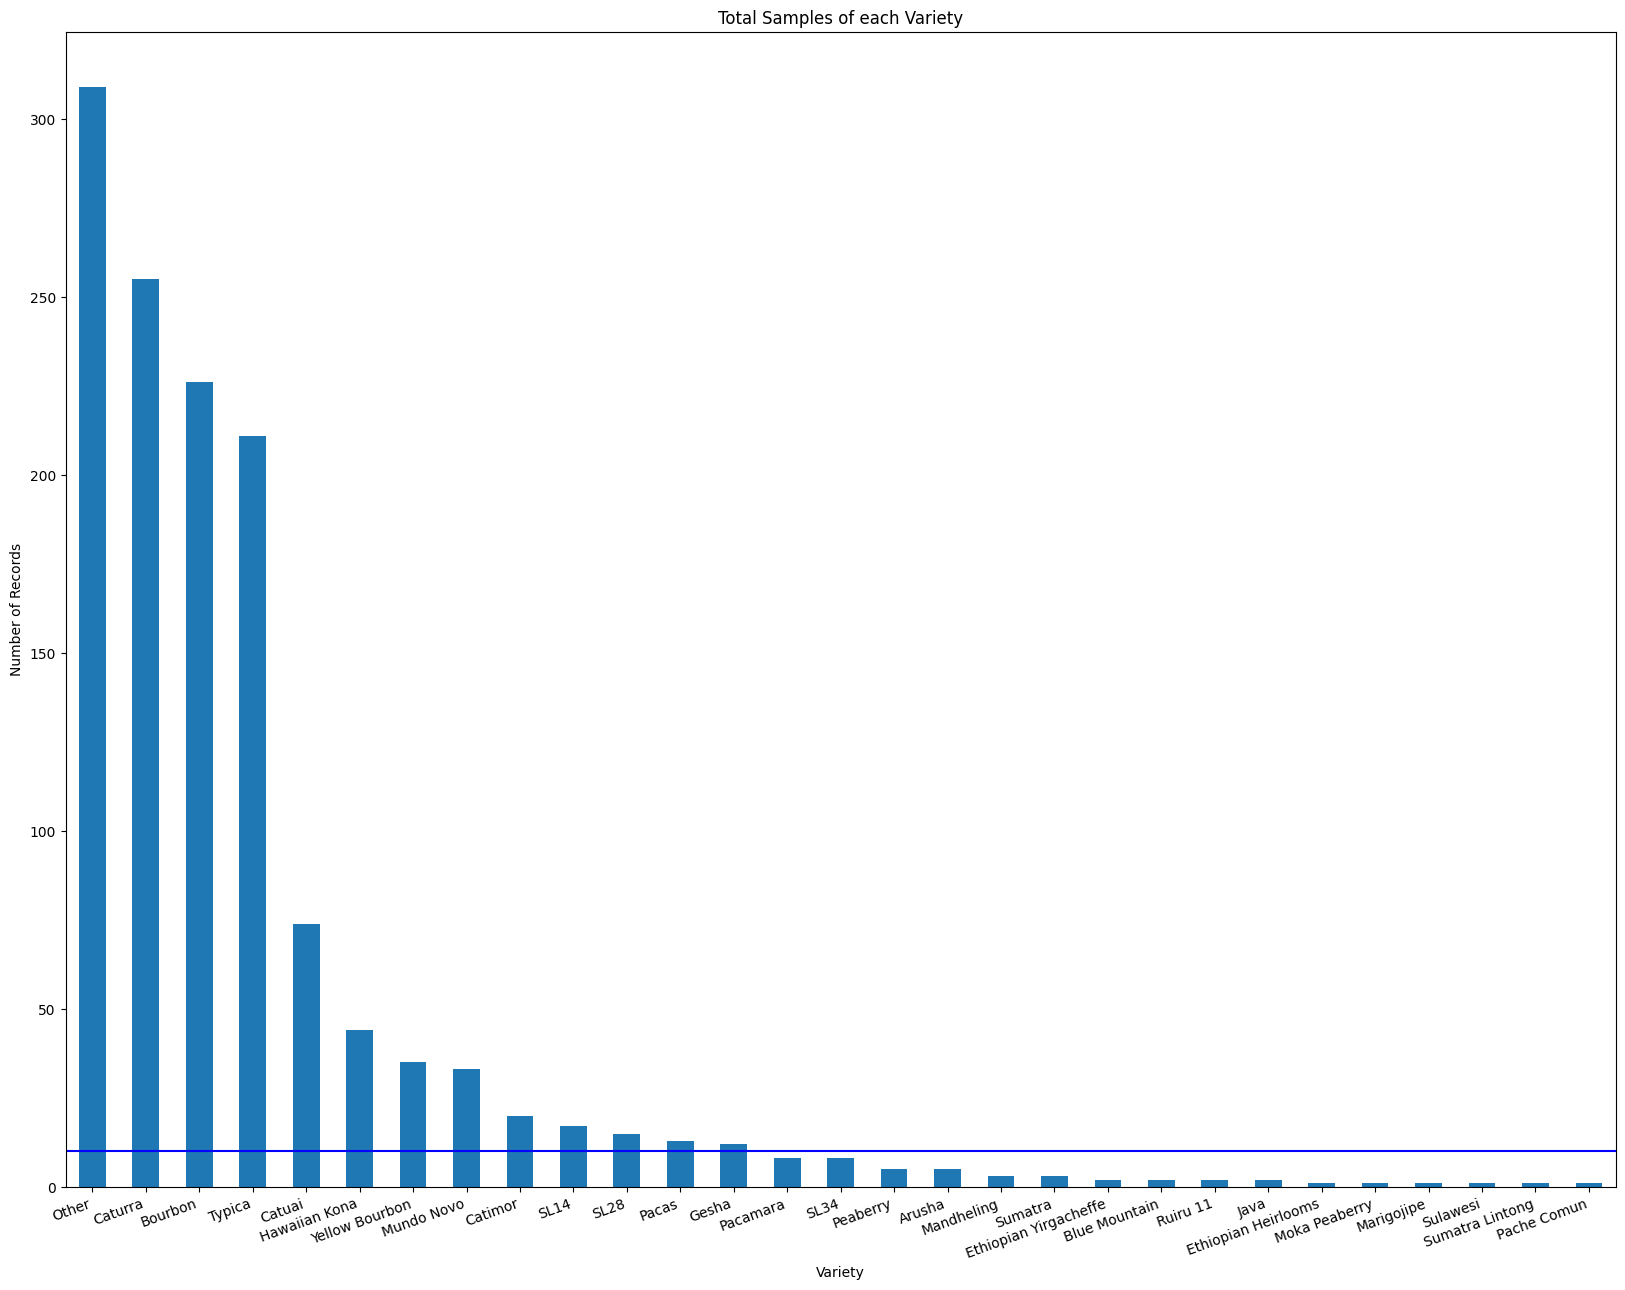

In [18]:
variety_count.plot(kind='bar', figsize=[20,15], title='Total Samples of each Variety', ylabel='Number of Records')
plt.axline(xy1=(0,10), slope=0, color='blue')
plt.xticks(ha='right', rotation=20)
plt.show()

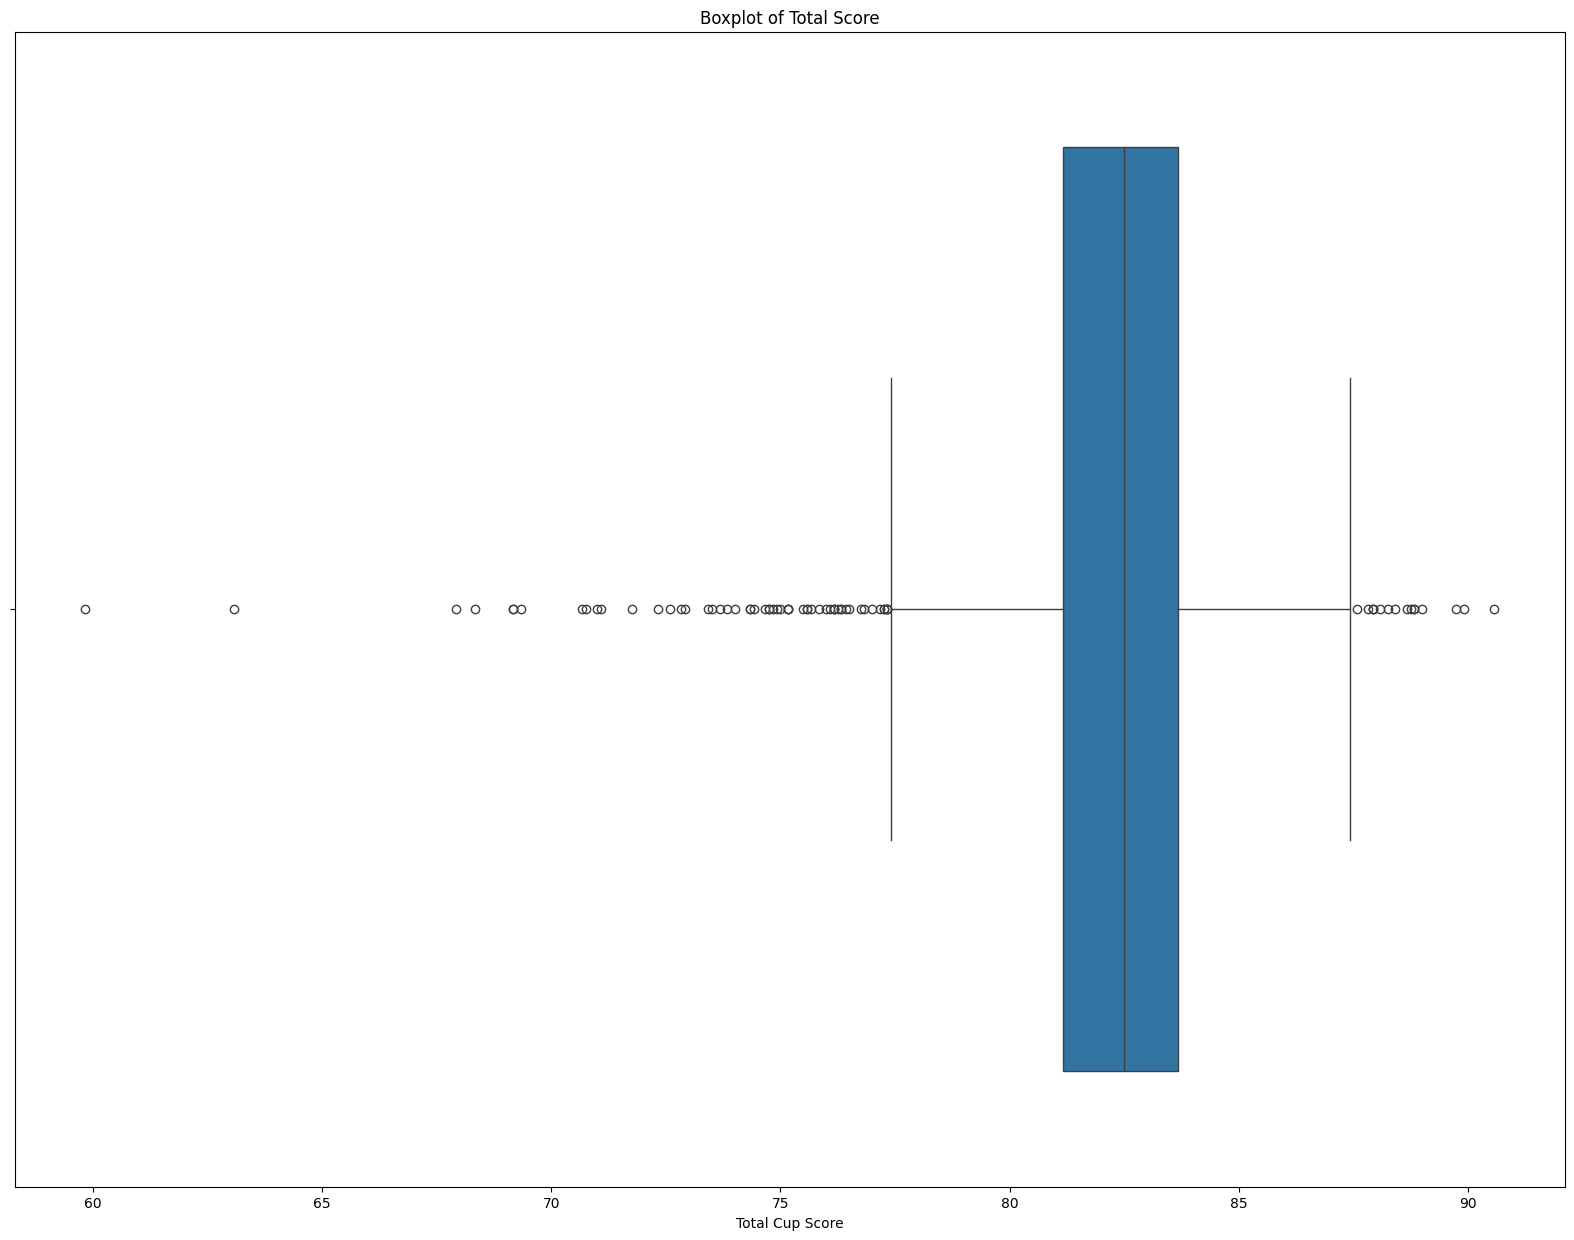

In [19]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Total_Cup_Points',data=grade_variety)
plt.title('Boxplot of Total Score')
plt.xlabel('Total Cup Score')
plt.show()

In [20]:
grade_variety = grade_variety[grade_variety['Total_Cup_Points']>=70].reset_index(drop=True).copy()

In [21]:
grade_mean = grade_variety.Total_Cup_Points.mean()
print("The mean for Total Cup Point is " + str(round(grade_mean,2)))
grade_median = grade_variety.Total_Cup_Points.median()
print("The median for Total Cup Point is " + str(round(grade_median,2)))
grade_std = grade_variety.Total_Cup_Points.std()
print("The standard deviation for Total Cup Point is " + str(round(grade_std,2)) + " points")

The mean for Total Cup Point is 82.26
The median for Total Cup Point is 82.58
The standard deviation for Total Cup Point is 2.43 points


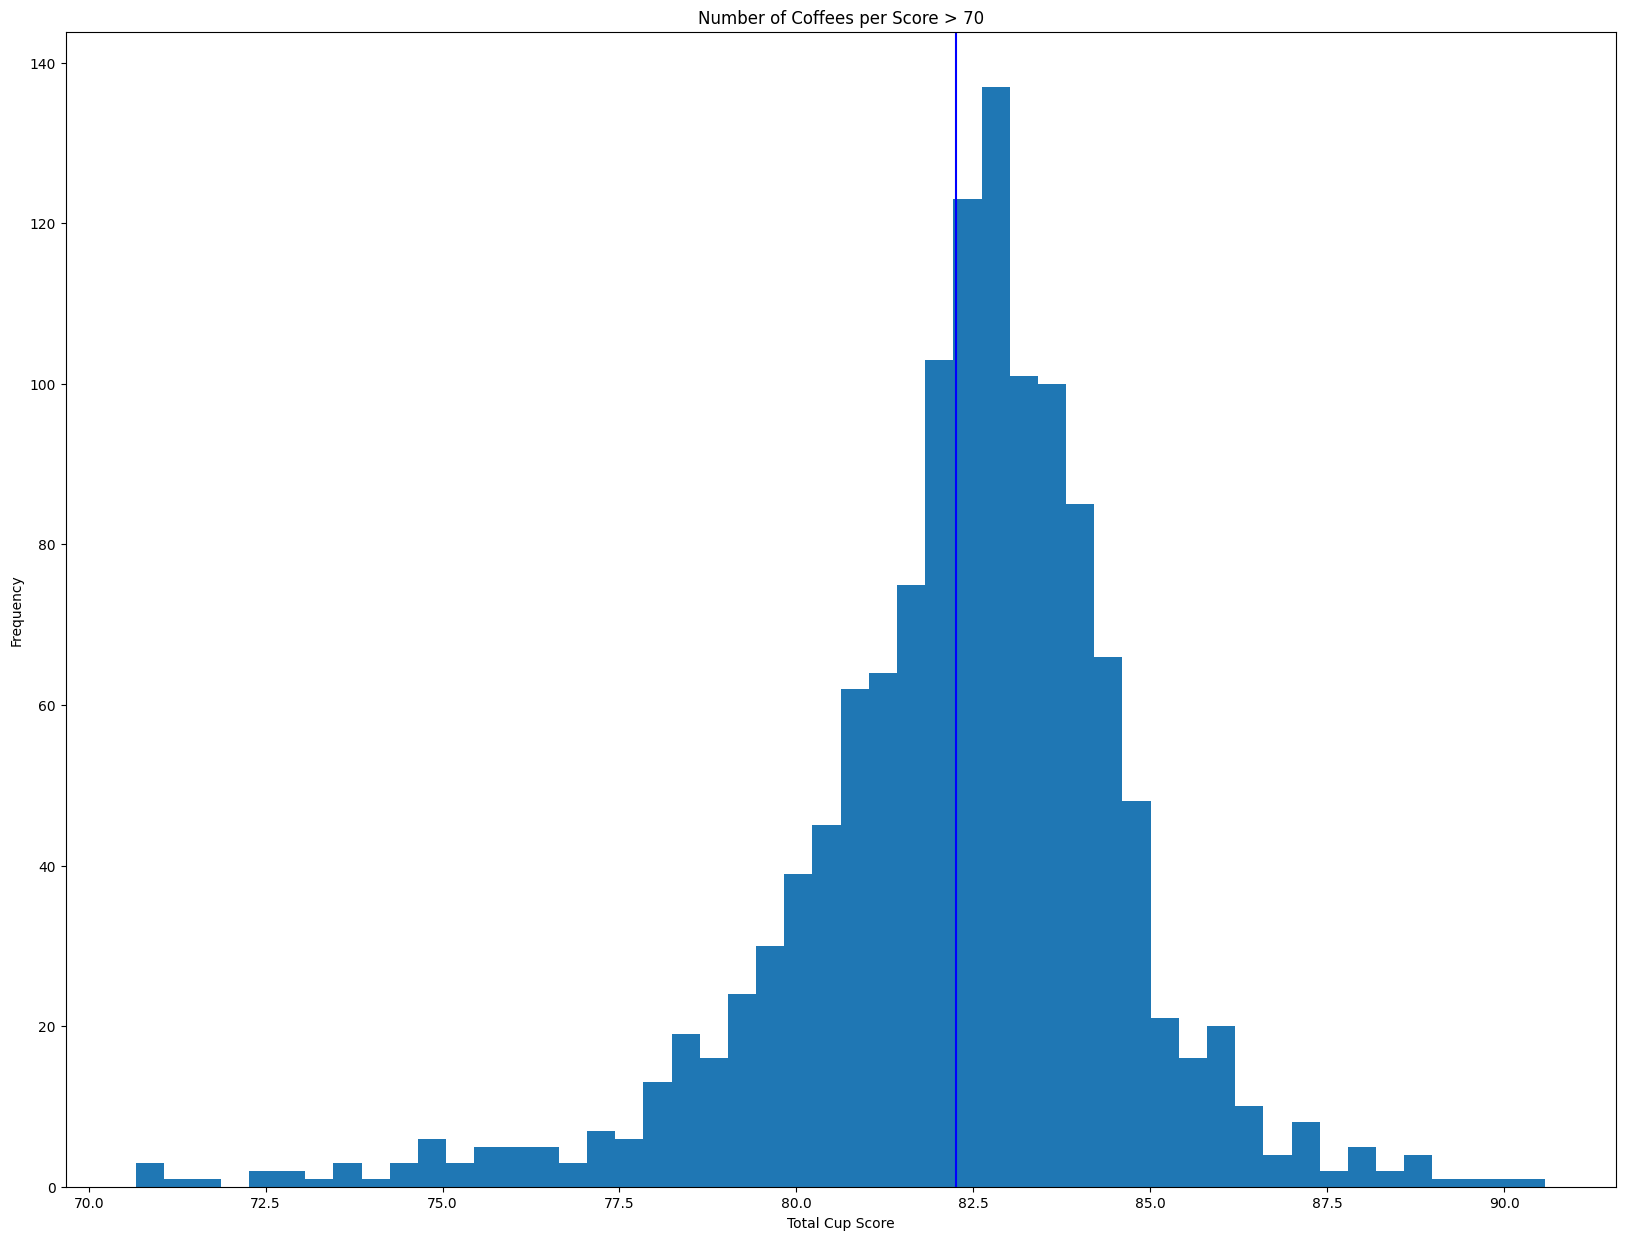

In [22]:
plt.figure(figsize=[20,15], facecolor='white')
grade_variety['Total_Cup_Points'].plot(kind='hist', bins=50, title='Number of Coffees per Score > 70', xlabel='Total Cup Score')
plt.axvline(x=grade_mean, color='blue')
plt.show()

In [23]:
grade_variety['count_variety'] = grade_variety.groupby('Variety')['Total_Cup_Points'].transform('nunique')
grade_df = grade_variety[grade_variety.count_variety >= 10]
grouped_grade_variety = grade_df.loc[:,['Variety', 'Total_Cup_Points']].groupby('Variety').median().sort_values(by='Total_Cup_Points', ascending=False)

Text(0, 0.5, 'Total Grade')

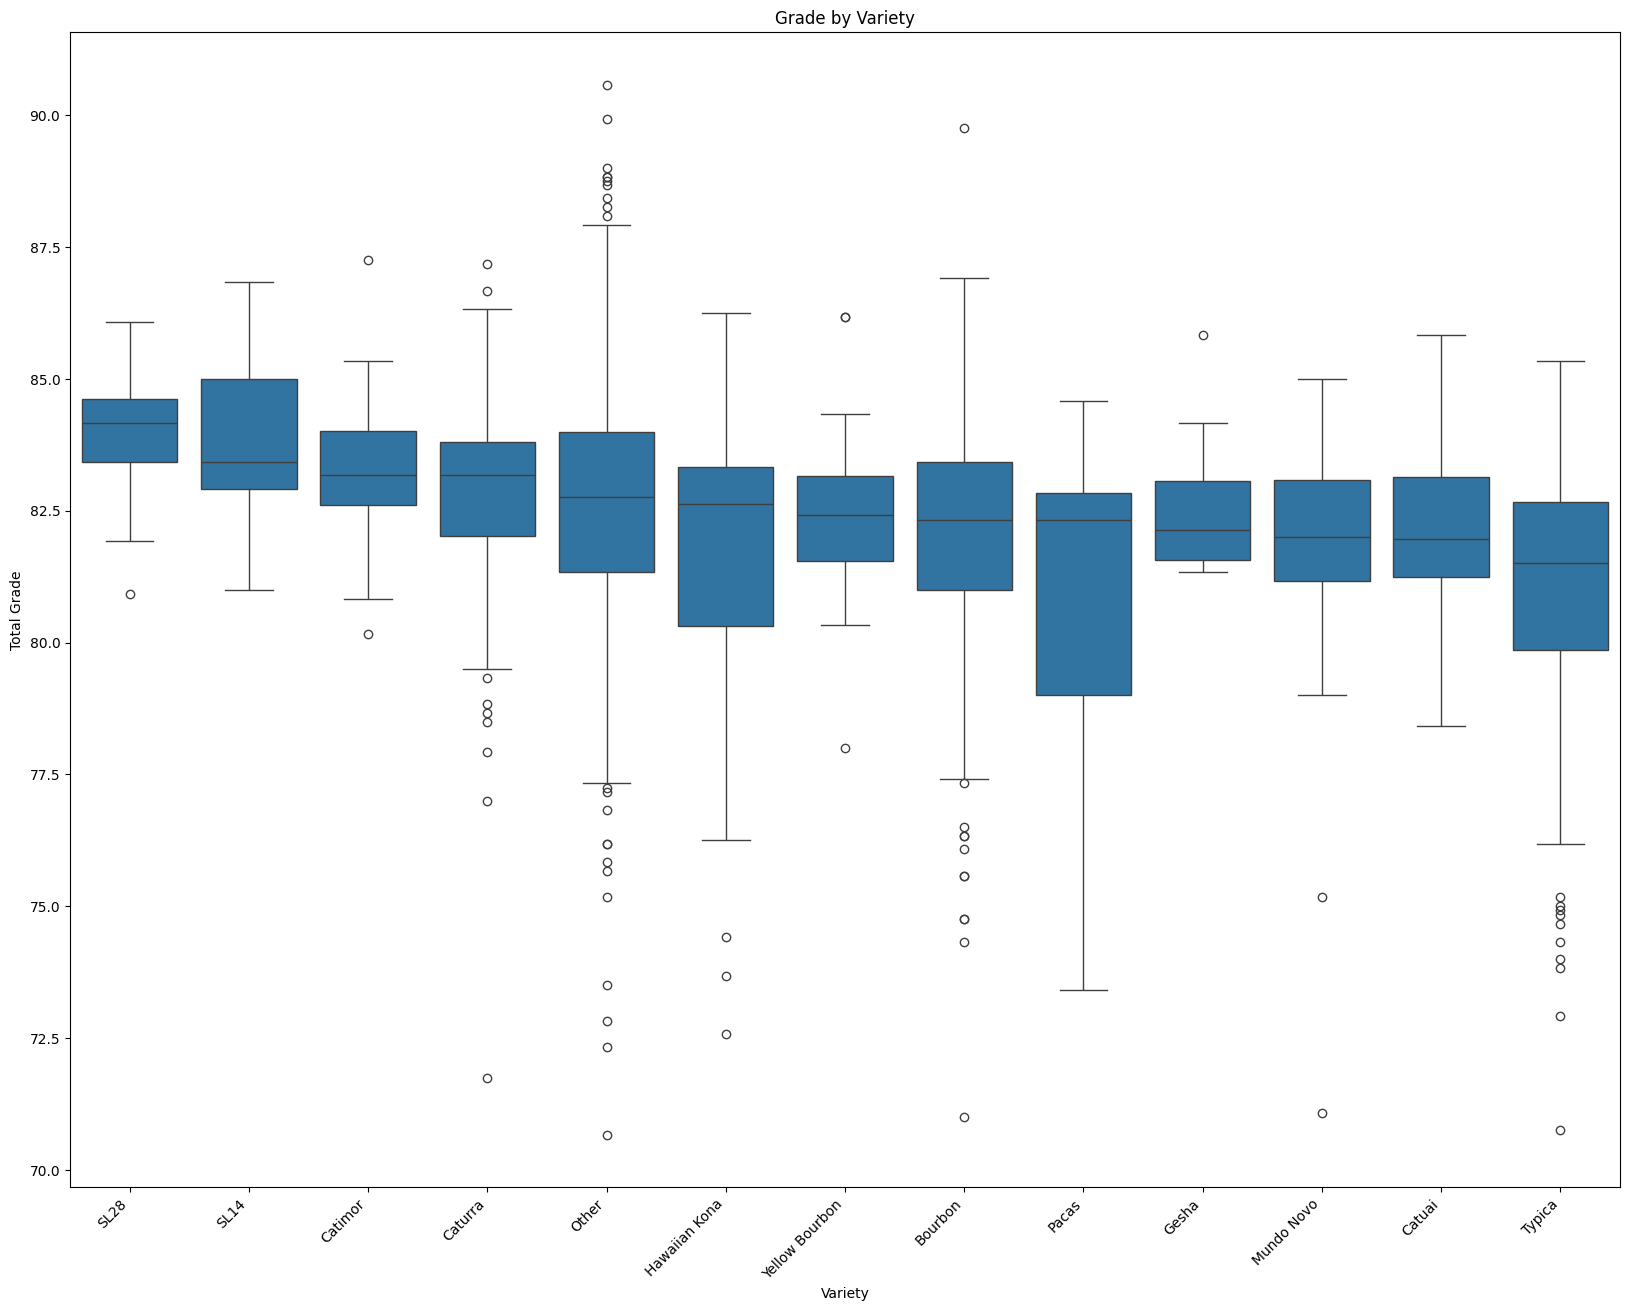

In [25]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Variety', y='Total_Cup_Points',data=grade_variety, order=grouped_grade_variety.index)
plt.title('Grade by Variety')
plt.xlabel('Variety')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Total Grade')


In [27]:
uom = arabicaData[['unit_of_measurement','altitude_mean_meters']].groupby(['unit_of_measurement']).count()
uom

,altitude_mean_meters
unit_of_measurement,
ft,111
m,973


In [32]:
altitudeFt = arabicaData[(arabicaData['unit_of_measurement'] == 'ft') * (arabicaData['altitude_mean_meters'] > 0)].copy()   
print(altitudeFt['Altitude'].unique())

['2000 ft' '1400ft' '5000' '4650' '5600-5760 metros' '3500-5200 feet'
 '4300' '5000 ft.' '4000 psn' '3600-6200 ft' '4400-4700 ft' '3607'
 '4000 psnm' '3664' '5440 - 5760 metros' '4921ft' '2800 ft' '4451 metros'
 '3702' '4000' '4600 ft.' '4200 feet' '5000 pies' '4500 pies' '4500'
 '5440-5760 metros' '4000psn' '518' '5500 metros' '5500-6000 psnm' '4563'
 '4500-6000 feet' '4000 ft' '5000 f' '5600 feet' '3500 ft' '4540 metros'
 '4000 p.s.n.m.' '6100 metros' '3000 ft' '3500 - 5200 feet' '4000 p.s.n.m']


In [33]:
altitudeFt['Altitude'] = altitudeFt['Altitude'].str.extract(pat='(\d+)', expand=False).astype(float)
altitudeFt['ft_to_m'] = altitudeFt['Altitude'] * 0.3048
print(altitudeFt[['Altitude', 'altitude_mean_meters', 'ft_to_m']].to_string())

      Altitude  altitude_mean_meters    ft_to_m
13      2000.0              609.6000   609.6000
51      1400.0              426.7200   426.7200
57      5000.0             1524.0000  1524.0000
58      4650.0             1417.3200  1417.3200
69      5600.0             1731.2640  1706.8800
105     3500.0             1325.8800  1066.8000
138     4300.0             1310.6400  1310.6400
139     5000.0             1524.0000  1524.0000
148     5000.0             1524.0000  1524.0000
149     4000.0             1219.2000  1219.2000
164     4300.0             1310.6400  1310.6400
189     3600.0             1493.5200  1097.2800
190     4400.0             1386.8400  1341.1200
195     3607.0             1099.4136  1099.4136
203     4000.0             1219.2000  1219.2000
213     3664.0             1116.7872  1116.7872
226     4300.0             1310.6400  1310.6400
243     5440.0             1706.8800  1658.1120
245     4000.0             1219.2000  1219.2000
246     4000.0             1219.2000  12

In [34]:
arabicaData[(arabicaData.altitude_mean_meters < 200) * (arabicaData.altitude_mean_meters >= 100)]

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
127,128,Arabica,松澤宏樹 koju matsuzawa,Japan,ada farm,MCRKPBG 15/16,ada farm,NaN,matsuzawa coffee,170,...,Green,0,"November 2nd, 2017",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,170.0000,170.0000,170.0000
435,436,Arabica,exportadora de cafe condor s.a,Colombia,NaN,NaN,trilladora boananza,3-68-0089,exportadora de cafe condor s.a,175,...,Green,1,"February 21st, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,175.0000,175.0000,175.0000
442,443,Arabica,taylor winch (t) ltd,"Tanzania, United Republic Of",mamsera,AA,rafiki (coffee) limited,033/0004,volcafe/taylorwinch tanzania ltd,16.8,...,Green,3,"June 20th, 2018",Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,m,168.0000,168.0000,168.0000
584,585,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0369,beneficio ixchel,11/23/0369,"unex guatemala, s.a.",518,...,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
595,596,Arabica,coffee export,Colombia,NaN,NaN,trilladora mercedes,3-201-1817,coffee export,1.65,...,Green,0,"May 27th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,165.0000,165.0000,165.0000
677,678,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0400,beneficio ixchel,11/23/0400,"unex guatemala, s.a.",518,...,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
833,834,Arabica,juan luis alvarado romero,Guatemala,la esmeralda,11/23/0634,beneficio ixchel,11/23/0634,"unex guatemala, s.a.",518,...,Green,1,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,157.8864,157.8864,157.8864
885,886,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,mu he zi coffee 木盒子咖啡園,NaN,mu he zi coffee 木盒子咖啡園,NaN,blossom valley宸嶧國際,150 m,...,Green,0,"December 26th, 2014",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,150.0000,150.0000,150.0000
914,915,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,谷泉咖啡莊園,NaN,寶島咖啡,123,宸嶧國際,160-200m,...,Green,2,"September 16th, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,160.0000,200.0000,180.0000
930,931,Arabica,jacques pereira carneiro,Brazil,sertao,NaN,cocarive,002/1352/0099,exportadora de cafés carmo de minas ltda,1.25,...,Blue-Green,2,"April 12th, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,125.0000,125.0000,125.0000


In [36]:
altitude_df = arabicaData[['altitude_mean_meters', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})
altitude_df.altitude_mean_meters = altitude_df.altitude_mean_meters.fillna(0).astype('float64')
altitude_df = altitude_df[altitude_df.Total_Cup_Points > 0].reset_index(drop=True).copy()
altitude_df = altitude_df[altitude_df.altitude_mean_meters > 0].reset_index(drop=True).copy()
altitude_df[altitude_df.altitude_mean_meters < 200]

,altitude_mean_meters,Total_Cup_Points
31,12.0000,86.17
32,12.0000,86.17
75,1.0000,85.00
97,170.0000,84.67
222,1.0000,83.83
350,175.0000,83.25
357,168.0000,83.17
392,1.0000,83.08
480,157.8864,82.75
491,165.0000,82.75


In [37]:
altitude_edit_df = altitude_df[altitude_df['altitude_mean_meters'].between(500,2500)]

In [38]:
grade_variety_alt = arabicaData[['Variety', 'altitude_mean_meters', 'Total.Cup.Points']].copy().rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})
grade_variety_alt.Variety = grade_variety_alt.Variety.fillna('Unknown')
grade_variety_alt.altitude_mean_meters = grade_variety_alt.altitude_mean_meters.fillna(0).astype('float64')
grade_variety_alt = grade_variety_alt[grade_variety_alt['altitude_mean_meters'].between(500,2500)]
print(grade_variety_alt)

      Variety  altitude_mean_meters  Total_Cup_Points
0     Unknown               2075.00             90.58
1       Other               2075.00             89.92
2     Bourbon               1700.00             89.75
3     Unknown               2000.00             89.00
4       Other               2075.00             88.83
...       ...                   ...               ...
1305   Catuai               1450.00             69.17
1306  Bourbon                900.00             68.33
1308  Caturra               1100.00             63.08
1309   Catuai               1417.32             59.83
1310  Caturra               1400.00              0.00

[1006 rows x 3 columns]


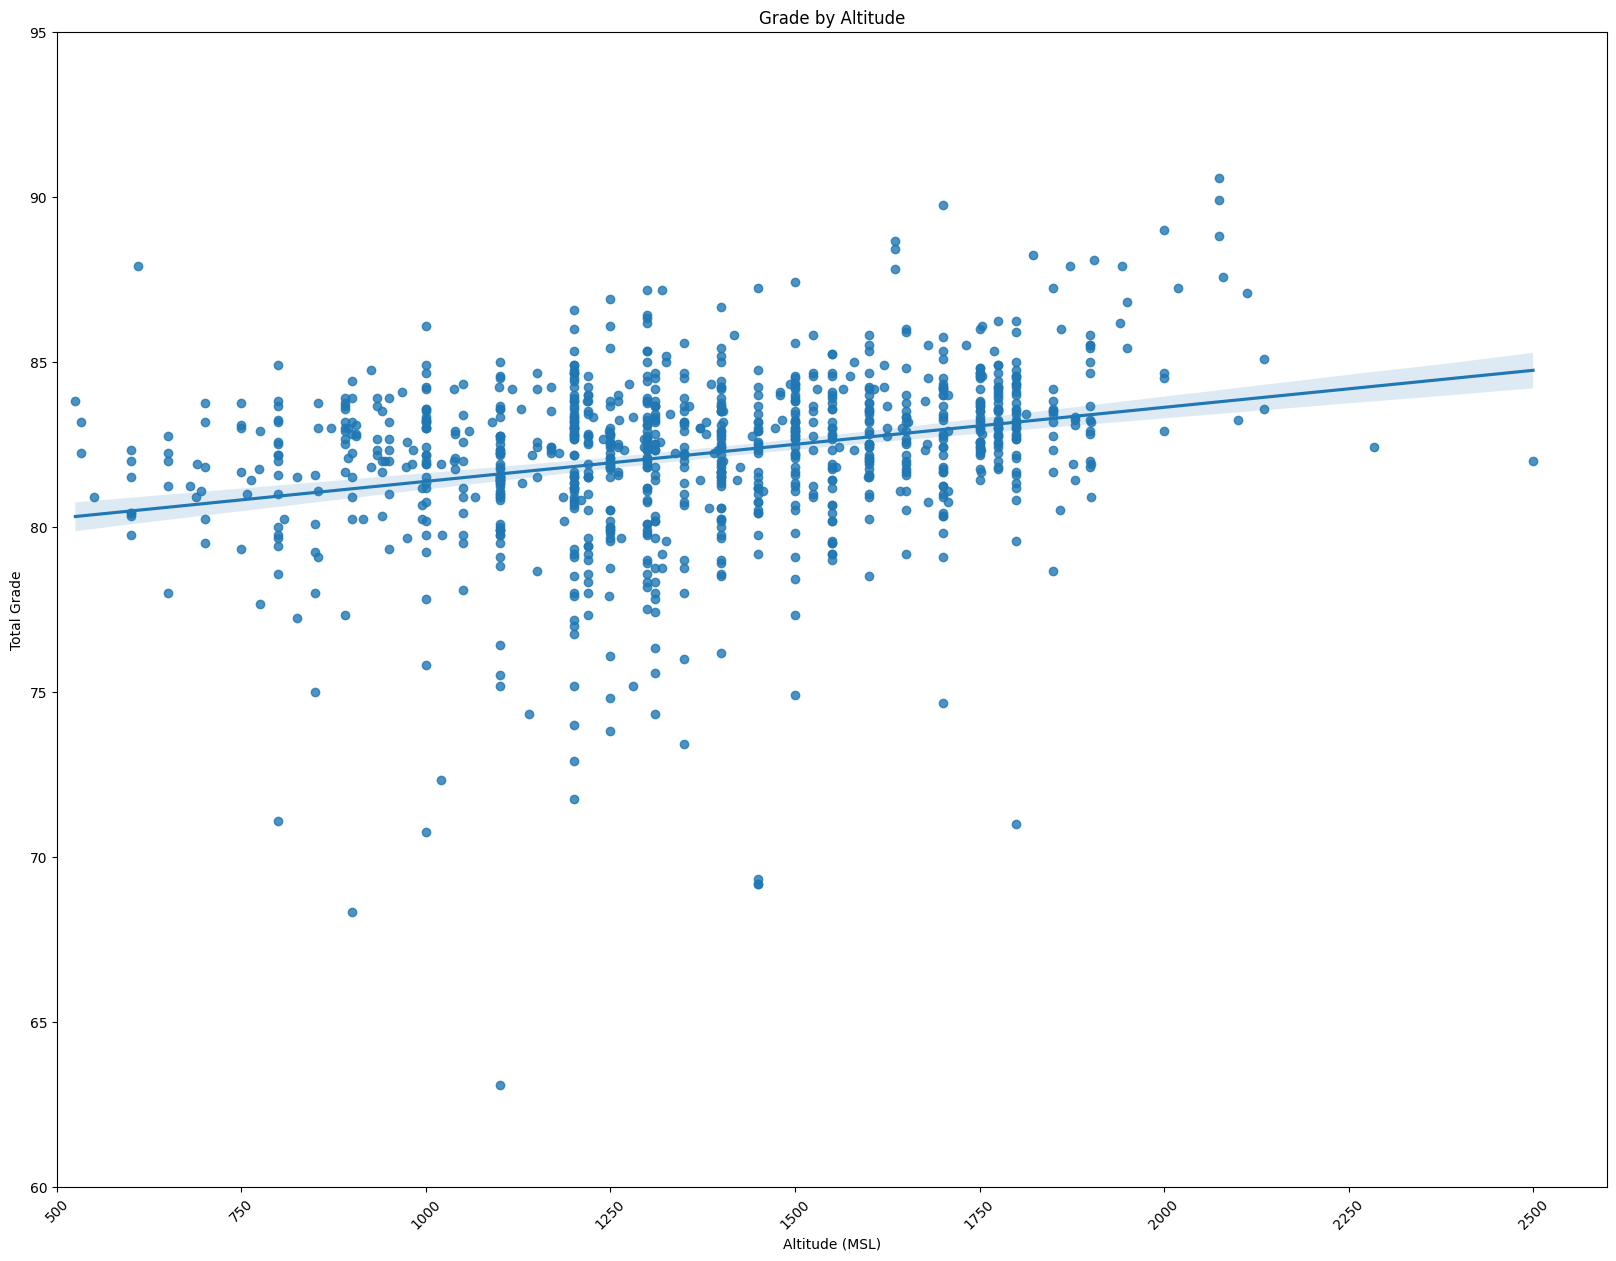

In [39]:
plt.figure(figsize=[20,15], facecolor='white')
sns.regplot(x='altitude_mean_meters',y='Total_Cup_Points', data=altitude_edit_df)
plt.title('Grade by Altitude')
plt.xlabel('Altitude (MSL)')
plt.xticks(rotation = 45)
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.xlim(500, 2600)
plt.savefig('grade_by_altitude.png')

In [40]:
bourbon_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Bourbon']
typica_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Typica']
caturra_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Caturra']
catuai_cup_score = grade_variety['Total_Cup_Points'][grade_variety.Variety == 'Catuai']

(60.0, 95.0)

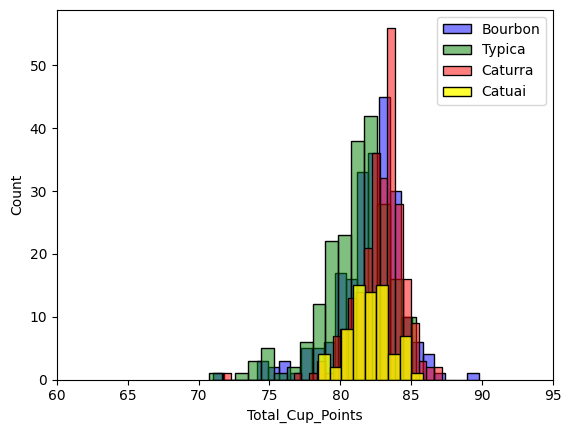

In [41]:
sns.histplot(bourbon_cup_score,color='blue', alpha=.5, label='Bourbon')
sns.histplot(typica_cup_score,color='green', alpha=.5, label='Typica')
sns.histplot(caturra_cup_score,color='red', alpha=.5, label='Caturra')
sns.histplot(catuai_cup_score,color='yellow', alpha=.8, label='Catuai')
plt.legend()
plt.xlim(60, 95)

In [42]:
ratio_1 = np.std(bourbon_cup_score)/np.std(typica_cup_score)
ratio_2 = np.std(bourbon_cup_score)/np.std(caturra_cup_score)
ratio_3 = np.std(bourbon_cup_score)/np.std(catuai_cup_score)
ratio_4 = np.std(typica_cup_score)/np.std(caturra_cup_score)
ratio_5 = np.std(typica_cup_score)/np.std(catuai_cup_score)
ratio_6 = np.std(caturra_cup_score)/np.std(catuai_cup_score)
print("Bourbon over Typica: " + str(ratio_1))
print("Bourbon over Caturra: " + str(ratio_2))
print("Bourbon over Catuai: " + str(ratio_3))
print("Typica over Caturra: " + str(ratio_4))
print("Typica over Catuai: " + str(ratio_5))
print("Caturra over Catuai: " + str(ratio_6))

Bourbon over Typica: 0.9765004208673582
Bourbon over Caturra: 1.3803091260249283
Bourbon over Catuai: 1.5283254870743075
Typica over Caturra: 1.4135264015543327
Typica over Catuai: 1.5651047909603573
Caturra over Catuai: 1.1072342117128813


In [44]:
fstat, pval = f_oneway(bourbon_cup_score, typica_cup_score, catuai_cup_score, caturra_cup_score)
print(pval)

3.777059601751822e-16


In [45]:
top_score = grade_variety_alt[(grade_variety_alt.Variety == 'Bourbon')|(grade_variety_alt.Variety == 'Typica')|(grade_variety_alt.Variety == 'Caturra')|(grade_variety_alt.Variety == 'Catuai')].copy().reset_index()
print(top_score)

     index  Variety  altitude_mean_meters  Total_Cup_Points
0        2  Bourbon               1700.00             89.75
1       21  Caturra               1300.00             87.17
2       25  Bourbon               1250.00             86.92
3       28  Caturra               1400.00             86.67
4       32  Bourbon               1300.00             86.42
..     ...      ...                   ...               ...
670   1305   Catuai               1450.00             69.17
671   1306  Bourbon                900.00             68.33
672   1308  Caturra               1100.00             63.08
673   1309   Catuai               1417.32             59.83
674   1310  Caturra               1400.00              0.00

[675 rows x 4 columns]


In [51]:
altitude_group = grade_variety_alt[grade_variety_alt["Total_Cup_Points"] >= 1].copy()
altitude_group['altitude_bin'] = pd.qcut(grade_variety_alt['altitude_mean_meters'],4).copy()
altitude_group['score_bin'] = pd.cut(grade_variety_alt['Total_Cup_Points'],[0, 80, 85, 90,100], labels=['Below Specialty Quality','Very Good','Excellent','Outstanding']).copy()
altitude_group

,Variety,altitude_mean_meters,Total_Cup_Points,altitude_bin,score_bin
0,Unknown,2075.00,90.58,"(1600.0, 2500.0]",Outstanding
1,Other,2075.00,89.92,"(1600.0, 2500.0]",Excellent
2,Bourbon,1700.00,89.75,"(1600.0, 2500.0]",Excellent
3,Unknown,2000.00,89.00,"(1600.0, 2500.0]",Excellent
4,Other,2075.00,88.83,"(1600.0, 2500.0]",Excellent
...,...,...,...,...,...
1304,Catuai,1450.00,69.17,"(1350.0, 1600.0]",Below Specialty Quality
1305,Catuai,1450.00,69.17,"(1350.0, 1600.0]",Below Specialty Quality
1306,Bourbon,900.00,68.33,"(524.999, 1200.0]",Below Specialty Quality
1308,Caturra,1100.00,63.08,"(524.999, 1200.0]",Below Specialty Quality


In [52]:
from scipy.stats import chi2_contingency
score_alt_freq = pd.crosstab(altitude_group['score_bin'], altitude_group['altitude_bin'])
score_alt_freq


altitude_bin,"(524.999, 1200.0]","(1200.0, 1350.0]","(1350.0, 1600.0]","(1600.0, 2500.0]"
score_bin,,,,
Below Specialty Quality,58,49,26,7
Very Good,251,141,203,202
Excellent,5,12,13,37
Outstanding,0,0,0,1


In [53]:
score_alt_prop = score_alt_freq/len(altitude_group)
score_alt_prop


altitude_bin,"(524.999, 1200.0]","(1200.0, 1350.0]","(1350.0, 1600.0]","(1600.0, 2500.0]"
score_bin,,,,
Below Specialty Quality,0.057711,0.048756,0.025871,0.006965
Very Good,0.249751,0.140299,0.201990,0.200995
Excellent,0.004975,0.011940,0.012935,0.036816
Outstanding,0.000000,0.000000,0.000000,0.000995


In [54]:
chi2, pval, dof, expected = chi2_contingency(score_alt_freq)
print(chi2)
print(expected)

88.42486089153608
[[4.37412935e+01 2.81393035e+01 3.37114428e+01 3.44079602e+01]
 [2.49012935e+02 1.60193035e+02 1.91914428e+02 1.95879602e+02]
 [2.09333333e+01 1.34666667e+01 1.61333333e+01 1.64666667e+01]
 [3.12437811e-01 2.00995025e-01 2.40796020e-01 2.45771144e-01]]


In [55]:
print(altitude_group['score_bin'])


0                   Outstanding
1                     Excellent
2                     Excellent
3                     Excellent
4                     Excellent
                 ...           
1304    Below Specialty Quality
1305    Below Specialty Quality
1306    Below Specialty Quality
1308    Below Specialty Quality
1309    Below Specialty Quality
Name: score_bin, Length: 1005, dtype: category
Categories (4, object): ['Below Specialty Quality' < 'Very Good' < 'Excellent' < 'Outstanding']


#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################D